# downloading data set

In [ ]:
!kaggle datasets download -d blastchar/telco-customer-churn

Dataset URL: https://www.kaggle.com/datasets/blastchar/telco-customer-churn
License(s): copyright-authors
100% 172k/172k [00:00<00:00, 446kB/s]
100% 172k/172k [00:00<00:00, 445kB/s]


In [ ]:
!unzip "/content/telco-customer-churn.zip"

Archive:  /content/telco-customer-churn.zip
  inflating: WA_Fn-UseC_-Telco-Customer-Churn.csv  


# preparing

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
pathfile = '/content/WA_Fn-UseC_-Telco-Customer-Churn.csv'
df = pd.read_csv(pathfile)

In [ ]:
df.shape

(7043, 21)

In [ ]:
df.head().T

,0,1,2,3,4
customerID,7590-VHVEG,5575-GNVDE,3668-QPYBK,7795-CFOCW,9237-HQITU
gender,Female,Male,Male,Male,Female
SeniorCitizen,0,0,0,0,0
Partner,Yes,No,No,No,No
Dependents,No,No,No,No,No
tenure,1,34,2,45,2
PhoneService,No,Yes,Yes,No,Yes
MultipleLines,No phone service,No,No,No phone service,No
InternetService,DSL,DSL,DSL,DSL,Fiber optic
OnlineSecurity,No,Yes,Yes,Yes,No


In [ ]:
df.apply(lambda x: pd.unique(x)).T

,0
customerID,"[7590-VHVEG, 5575-GNVDE, 3668-QPYBK, 7795-CFOC..."
gender,"[Female, Male]"
SeniorCitizen,"[0, 1]"
Partner,"[Yes, No]"
Dependents,"[No, Yes]"
tenure,"[1, 34, 2, 45, 8, 22, 10, 28, 62, 13, 16, 58, ..."
PhoneService,"[No, Yes]"
MultipleLines,"[No phone service, No, Yes]"
InternetService,"[DSL, Fiber optic, No]"
OnlineSecurity,"[No, Yes, No internet service]"


In [ ]:
df.dtypes

,0
customerID,object
gender,object
SeniorCitizen,int64
Partner,object
Dependents,object
tenure,int64
PhoneService,object
MultipleLines,object
InternetService,object
OnlineSecurity,object


In [ ]:
df['TotalCharges'].str.contains(' ').sum()

11

In [ ]:
total_charges = pd.to_numeric(df.TotalCharges, errors='coerce')

In [ ]:
df.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [ ]:
df[total_charges.isnull()][['customerID', 'TotalCharges']]

,customerID,TotalCharges
488,4472-LVYGI,
753,3115-CZMZD,
936,5709-LVOEQ,
1082,4367-NUYAO,
1340,1371-DWPAZ,
3331,7644-OMVMY,
3826,3213-VVOLG,
4380,2520-SGTTA,
5218,2923-ARZLG,
6670,4075-WKNIU,


In [ ]:
df.TotalCharges = pd.to_numeric(df.TotalCharges, errors='coerce')
df.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [ ]:
df.TotalCharges = df.TotalCharges.fillna(0)

In [ ]:
df.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [ ]:
df.dtypes

,0
customerID,object
gender,object
SeniorCitizen,int64
Partner,object
Dependents,object
tenure,int64
PhoneService,object
MultipleLines,object
InternetService,object
OnlineSecurity,object


In [ ]:
df.columns = df.columns.str.lower().str.replace(' ', '_')
string_columns = list(df.dtypes[df.dtypes == 'object'].index)
for col in string_columns:
 df[col] = df[col].str.lower().str.replace(' ', '_')

In [ ]:
df.churn = (df.churn == 'yes').astype(int)

split the data

In [ ]:
from sklearn.model_selection import train_test_split
df_train_full, df_test = train_test_split(df, test_size=0.2, random_state=1)

In [ ]:
df_train, df_val = train_test_split(df_train_full, test_size=0.33,
random_state=11)
y_train = df_train.churn.values
y_val = df_val.churn.values
del df_train['churn']
del df_val['churn']


# **EDA**

In [ ]:
df_train_full.churn.value_counts()#data imbalance

,count
churn,
0,4113
1,1521


In [ ]:
global_mean = df_train_full.churn.mean()#percentege of churn(postive value)
round(global_mean, 3)*100

27.0

split coloumns into categorical and numerical

In [ ]:
categorical = ['gender', 'seniorcitizen', 'partner', 'dependents',
 'phoneservice', 'multiplelines', 'internetservice',
 'onlinesecurity', 'onlinebackup', 'deviceprotection',
 'techsupport', 'streamingtv', 'streamingmovies',
 'contract', 'paperlessbilling', 'paymentmethod']
numerical = ['tenure', 'monthlycharges', 'totalcharges']

In [ ]:
df_train_full[categorical].nunique()

,0
gender,2
seniorcitizen,2
partner,2
dependents,2
phoneservice,2
multiplelines,3
internetservice,3
onlinesecurity,3
onlinebackup,3
deviceprotection,3


# feature importance

churn rate

In [ ]:
female_mean = df_train_full[df_train_full.gender == 'female'].churn.mean()

In [ ]:
male_mean = df_train_full[df_train_full.gender == 'male'].churn.mean()

In [ ]:
print(round(female_mean, 3))
print(round(male_mean, 3))

0.277
0.263


risk ratio

In [ ]:
for col in categorical:
 df_group = df_train_full.groupby(by=col).churn.agg(['mean'])
 df_group['diff'] = df_group['mean'] - global_mean
 df_group['rate'] = df_group['mean'] / global_mean
 display(df_group)

,mean,diff,rate
gender,,,
female,0.276824,0.006856,1.025396
male,0.263214,-0.006755,0.974980


,mean,diff,rate
seniorcitizen,,,
0,0.242270,-0.027698,0.897403
1,0.413377,0.143409,1.531208


,mean,diff,rate
partner,,,
no,0.329809,0.059841,1.221659
yes,0.205033,-0.064935,0.759472


,mean,diff,rate
dependents,,,
no,0.313760,0.043792,1.162212
yes,0.165666,-0.104302,0.613651


,mean,diff,rate
phoneservice,,,
no,0.241316,-0.028652,0.893870
yes,0.273049,0.003081,1.011412


,mean,diff,rate
multiplelines,,,
no,0.257407,-0.012561,0.953474
no_phone_service,0.241316,-0.028652,0.893870
yes,0.290742,0.020773,1.076948


,mean,diff,rate
internetservice,,,
dsl,0.192347,-0.077621,0.712482
fiber_optic,0.425171,0.155203,1.574895
no,0.077805,-0.192163,0.288201


,mean,diff,rate
onlinesecurity,,,
no,0.420921,0.150953,1.559152
no_internet_service,0.077805,-0.192163,0.288201
yes,0.153226,-0.116742,0.567570


,mean,diff,rate
onlinebackup,,,
no,0.404323,0.134355,1.497672
no_internet_service,0.077805,-0.192163,0.288201
yes,0.217232,-0.052736,0.804660


,mean,diff,rate
deviceprotection,,,
no,0.395875,0.125907,1.466379
no_internet_service,0.077805,-0.192163,0.288201
yes,0.230412,-0.039556,0.853480


,mean,diff,rate
techsupport,,,
no,0.418914,0.148946,1.551717
no_internet_service,0.077805,-0.192163,0.288201
yes,0.159926,-0.110042,0.592390


,mean,diff,rate
streamingtv,,,
no,0.342832,0.072864,1.269897
no_internet_service,0.077805,-0.192163,0.288201
yes,0.302723,0.032755,1.121328


,mean,diff,rate
streamingmovies,,,
no,0.338906,0.068938,1.255358
no_internet_service,0.077805,-0.192163,0.288201
yes,0.307273,0.037305,1.138182


,mean,diff,rate
contract,,,
month-to-month,0.431701,0.161733,1.599082
one_year,0.120573,-0.149395,0.446621
two_year,0.028274,-0.241694,0.104730


,mean,diff,rate
paperlessbilling,,,
no,0.172071,-0.097897,0.637375
yes,0.338151,0.068183,1.252560


,mean,diff,rate
paymentmethod,,,
bank_transfer_(automatic),0.168171,-0.101797,0.622928
credit_card_(automatic),0.164339,-0.105630,0.608733
electronic_check,0.455890,0.185922,1.688682
mailed_check,0.193870,-0.076098,0.718121


In [ ]:
from sklearn.metrics import mutual_info_score
def calculate_mi(series):
 return mutual_info_score(series, df_train_full.churn)
df_mi = df_train_full[categorical].apply(calculate_mi)
df_mi = df_mi.sort_values(ascending=False).to_frame(name='MI')
df_mi

,MI
contract,0.098320
onlinesecurity,0.063085
techsupport,0.061032
internetservice,0.055868
onlinebackup,0.046923
deviceprotection,0.043453
paymentmethod,0.043210
streamingtv,0.031853
streamingmovies,0.031581
paperlessbilling,0.017589


Correlation coff

In [ ]:
df_train_full[numerical].corrwith(df_train_full.churn)

,0
tenure,-0.351885
monthlycharges,0.196805
totalcharges,-0.196353


# feature engeniring

 One-hot encoding for categorical variables

In [ ]:
train_dict = df_train[categorical + numerical].to_dict(orient='records')

In [ ]:
train_dict[0]

{'gender': 'male',
 'seniorcitizen': 0,
 'partner': 'yes',
 'dependents': 'no',
 'phoneservice': 'yes',
 'multiplelines': 'no',
 'internetservice': 'dsl',
 'onlinesecurity': 'yes',
 'onlinebackup': 'yes',
 'deviceprotection': 'yes',
 'techsupport': 'yes',
 'streamingtv': 'yes',
 'streamingmovies': 'yes',
 'contract': 'two_year',
 'paperlessbilling': 'yes',
 'paymentmethod': 'bank_transfer_(automatic)',
 'tenure': 71,
 'monthlycharges': 86.1,
 'totalcharges': 6045.9}

In [ ]:
from sklearn.feature_extraction import DictVectorizer
dv = DictVectorizer(sparse=False)
dv.fit(train_dict)

DictVectorizer(sparse=False)

In [ ]:
X_train = dv.transform(train_dict)

In [ ]:
X_train[0]

array([0.0000e+00, 0.0000e+00, 1.0000e+00, 1.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00, 1.0000e+00,
       1.0000e+00, 0.0000e+00, 0.0000e+00, 8.6100e+01, 1.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00,
       0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00, 1.0000e+00,
       0.0000e+00, 1.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00,
       0.0000e+00, 0.0000e+00, 1.0000e+00, 7.1000e+01, 6.0459e+03])

# Machine learning for classification

 Logistic regression

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
model = LogisticRegression(solver='liblinear', random_state=1)
model.fit(X_train, y_train)

LogisticRegression(random_state=1, solver='liblinear')

In [ ]:
val_dict = df_val[categorical + numerical].to_dict(orient='records')
X_val = dv.transform(val_dict)

In [ ]:
y_pred = model.predict_proba(X_val)

In [ ]:
model.predict_proba(X_val)

array([[0.76508784, 0.23491216],
       [0.73113015, 0.26886985],
       [0.68054704, 0.31945296],
       ...,
       [0.94274614, 0.05725386],
       [0.38476895, 0.61523105],
       [0.93872763, 0.06127237]])

In [ ]:
y_pred = model.predict_proba(X_val)[:, 1]

In [ ]:
y_pred >= 0.5

array([False, False, False, ..., False,  True, False])

In [ ]:
churn = y_pred >= 0.5

In [ ]:
(y_val == churn).mean()


0.8016129032258065

In [ ]:
 model.intercept_[0]

-0.12198896163042137

In [ ]:
 model.coef_[0]

array([ 5.63350418e-01, -8.59198889e-02, -5.99419491e-01, -3.02820218e-02,
       -9.17069398e-02,  9.99283340e-02, -1.15868311e-01, -1.06048985e-01,
       -2.73676855e-02, -9.46212762e-02, -3.23348965e-01,  3.17228314e-01,
       -1.15868311e-01,  7.84317446e-04, -1.68096778e-01,  1.27134010e-01,
       -8.10261944e-02,  1.35706167e-01, -1.15868311e-01, -1.41826818e-01,
        2.57861725e-01, -1.15868311e-01, -2.63982375e-01, -2.12615137e-01,
        9.06261753e-02, -4.80303106e-02, -7.39586510e-02, -2.66766308e-02,
       -1.36245780e-01,  1.74748490e-01, -1.33815041e-01,  1.27134010e-01,
       -2.49122972e-01,  2.97090535e-01, -8.48662760e-02, -1.15868311e-01,
        7.87456252e-02, -9.90818957e-02, -1.15868311e-01,  9.29612449e-02,
        1.78141046e-01, -1.15868311e-01, -1.84261697e-01, -6.94862417e-02,
        4.47681302e-04])

# Using the model

In [ ]:
customer = {
 'customerid': '8879-zkjof',
 'gender': 'female',
 'seniorcitizen': 0,
 'partner': 'no',
 'dependents': 'no',
 'tenure': 41,
 'phoneservice': 'yes',
 'multiplelines': 'no',
 'internetservice': 'dsl',
 'onlinesecurity': 'yes',
 'onlinebackup': 'no',
 'deviceprotection': 'yes',
 'techsupport': 'yes',
 'streamingtv': 'yes',
 'streamingmovies': 'yes',
 'contract': 'one_year',
 'paperlessbilling': 'yes',
 'paymentmethod': 'bank_transfer_(automatic)',
 'monthlycharges': 79.85,
 'totalcharges': 3320.75,
}

In [ ]:
X_test = dv.transform([customer])

In [ ]:
model.predict_proba(X_test)

array([[0.92667889, 0.07332111]])

In [ ]:
model.predict_proba(X_test)[0, 1]*100

7.332111084949639

In [ ]:
customer = {
 'gender': 'female',
 'seniorcitizen': 1,
 'partner': 'no',
 'dependents': 'no',
 'phoneservice': 'yes',
 'multiplelines': 'yes',
 'internetservice': 'fiber_optic',
 'onlinesecurity': 'no',
 'onlinebackup': 'no',
 'deviceprotection': 'no',
 'techsupport': 'no',
 'streamingtv': 'yes',
 'streamingmovies': 'no',
 'contract': 'month-to-month',
 'paperlessbilling': 'yes',
 'paymentmethod': 'electronic_check',
 'tenure': 1,
 'monthlycharges': 85.7,
 'totalcharges': 85.7
}

In [ ]:
X_test = dv.transform([customer])
model.predict_proba(X_test)[0, 1]*100

83.21656556055403

# Continue


In [ ]:
from sklearn.metrics import accuracy_score
thresholds = np.linspace(0, 1, 21)
accuracies = []
for t in thresholds:
 acc = accuracy_score(y_val, y_pred >= t)
 accuracies.append(acc)

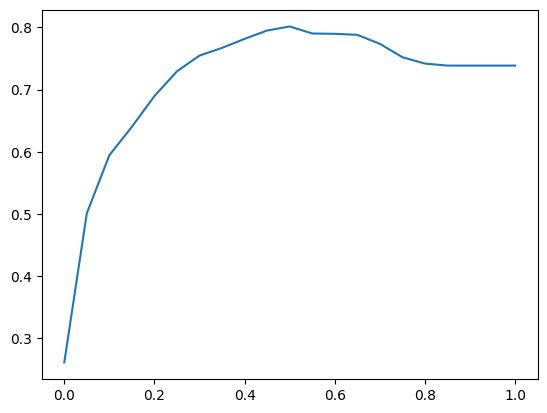

In [ ]:
plt.plot(thresholds, accuracies)

In [ ]:
size_val = len(y_val)
baseline = np.repeat(False, size_val)

In [ ]:
accuracy_score(baseline, y_val)

0.7387096774193549

confusion table

In [ ]:
t = 0.5
predict_churn = (y_pred >= t)
predict_no_churn = (y_pred < t)
actual_churn = (y_val == 1)
actual_no_churn = (y_val == 0)
true_positive = (predict_churn & actual_churn).sum()
false_positive = (predict_churn & actual_no_churn).sum()
false_negative = (predict_no_churn & actual_churn).sum()
true_negative = (predict_no_churn & actual_no_churn).sum()


In [ ]:
confusion_table = np.array(
 [[true_negative, false_positive],
 [false_negative, true_positive]])

In [ ]:
confusion_table

array([[1202,  172],
       [ 197,  289]])

In [ ]:
confusion_table / confusion_table.sum()

array([[0.64623656, 0.09247312],
       [0.10591398, 0.15537634]])

In [ ]:
scores = []
thresholds = np.linspace(0, 1, 101)

for t in thresholds:
 tp = ((y_pred >= t) & (y_val == 1)).sum()
 fp = ((y_pred >= t) & (y_val == 0)).sum()
 fn = ((y_pred < t) & (y_val == 1)).sum()
 tn = ((y_pred < t) & (y_val == 0)).sum()
 scores.append((t, tp, fp, fn, tn))

In [ ]:
df_scores = pd.DataFrame(scores)
df_scores.columns = ['threshold', 'tp', 'fp', 'fn', 'tn']

In [ ]:
df_scores[::10]


,threshold,tp,fp,fn,tn
0,0.0,486,1374,0,0
10,0.1,458,726,28,648
20,0.2,421,512,65,862
30,0.3,380,350,106,1024
40,0.4,337,257,149,1117
50,0.5,289,172,197,1202
60,0.6,200,105,286,1269
70,0.7,99,34,387,1340
80,0.8,7,1,479,1373
90,0.9,0,0,486,1374


In [ ]:
df_scores['tpr'] = df_scores.tp / (df_scores.tp + df_scores.fn)
df_scores['fpr'] = df_scores.fp / (df_scores.fp + df_scores.tn)

In [ ]:
df_scores[::10]

,threshold,tp,fp,fn,tn,tpr,fpr
0,0.0,486,1374,0,0,1.000000,1.000000
10,0.1,458,726,28,648,0.942387,0.528384
20,0.2,421,512,65,862,0.866255,0.372635
30,0.3,380,350,106,1024,0.781893,0.254731
40,0.4,337,257,149,1117,0.693416,0.187045
50,0.5,289,172,197,1202,0.594650,0.125182
60,0.6,200,105,286,1269,0.411523,0.076419
70,0.7,99,34,387,1340,0.203704,0.024745
80,0.8,7,1,479,1373,0.014403,0.000728
90,0.9,0,0,486,1374,0.000000,0.000000


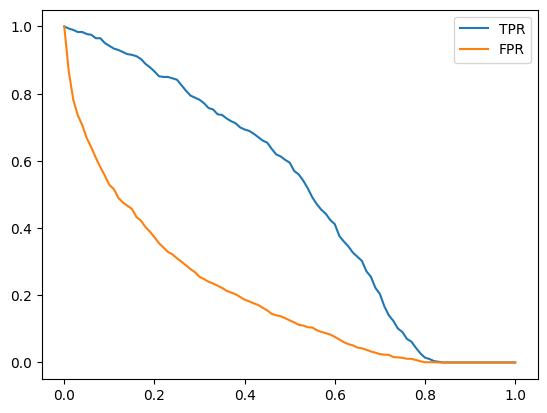

In [ ]:
plt.plot(df_scores.threshold, df_scores.tpr, label='TPR')
plt.plot(df_scores.threshold, df_scores.fpr, label='FPR')
plt.legend()

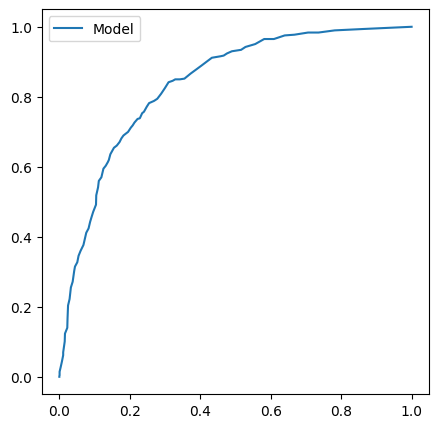

In [ ]:
plt.figure(figsize=(5, 5))
plt.plot(df_scores.fpr, df_scores.tpr, label='Model')
plt.legend()

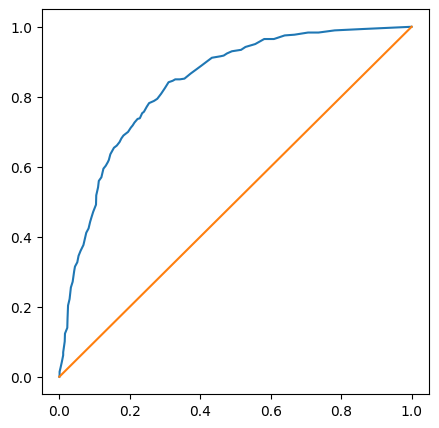

In [ ]:
plt.figure(figsize=(5, 5))
plt.plot(df_scores.fpr, df_scores.tpr)
plt.plot([0, 1], [0, 1])

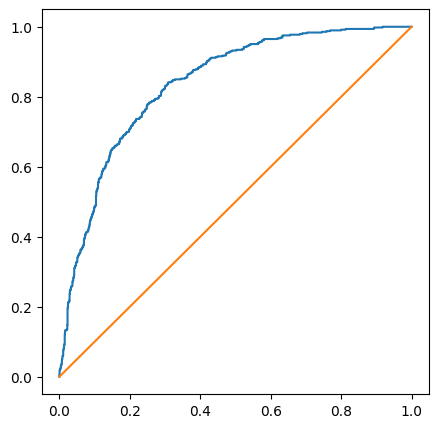

In [ ]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_val, y_pred)
plt.figure(figsize=(5, 5))
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1])


In [ ]:
from sklearn.metrics import auc
auc(df_scores.fpr, df_scores.tpr)

0.8359001084215382

In [ ]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_val, y_pred)

0.8363366398907399

# Parameter tuning

In [ ]:
def train(df, y):
 cat = df[categorical + numerical].to_dict(orient='records')
 dv = DictVectorizer(sparse=False)
 dv.fit(cat)
 X = dv.transform(cat)
 model = LogisticRegression(solver='liblinear')
 model.fit(X, y)
 return dv, model

In [ ]:
def predict(df, dv, model):
 cat = df[categorical + numerical].to_dict(orient='records')
 X = dv.transform(cat)
 y_pred = model.predict_proba(X)[:, 1]
 return y_pred

In [ ]:
from sklearn.model_selection import KFold
kfold = KFold(n_splits=10, shuffle=True, random_state=1)
aucs = []
for train_idx, val_idx in kfold.split(df_train_full):
 df_train = df_train_full.iloc[train_idx]
 df_val = df_train_full.iloc[val_idx]
 y_train = df_train.churn.values
 y_val = df_val.churn.values
 dv, model = train(df_train, y_train)
 y_pred = predict(df_val, dv, model)
 auc = roc_auc_score(y_val, y_pred)
 aucs.append(auc)

In [ ]:
print('auc = %0.3f ± %0.3f' % (np.mean(aucs), np.std(aucs)))

auc = 0.842 ± 0.012


In [ ]:
def train(df, y, C):
 cat = df[categorical + numerical].to_dict(orient='records')
 dv = DictVectorizer(sparse=False)
 dv.fit(cat)
 X = dv.transform(cat)
 model = LogisticRegression(solver='liblinear', C=C)
 model.fit(X, y)
 return dv, model

In [ ]:
nfolds = 5
kfold = KFold(n_splits=nfolds, shuffle=True, random_state=1)
for C in [0.001, 0.01, 0.1, 0.5, 1, 10]:
 aucs = []
 for train_idx, val_idx in kfold.split(df_train_full):
  df_train = df_train_full.iloc[train_idx]
  df_val = df_train_full.iloc[val_idx]
  y_train = df_train.churn.values
  y_val = df_val.churn.values
  dv, model = train(df_train, y_train, C=C)
  y_pred = predict(df_val, dv, model)
  auc = roc_auc_score(y_val, y_pred)
  aucs.append(auc)
 print('C=%s, auc = %0.3f ± %0.3f' % (C, np.mean(aucs), np.std(aucs)))

C=0.001, auc = 0.825 ± 0.013
C=0.01, auc = 0.839 ± 0.009
C=0.1, auc = 0.841 ± 0.008
C=0.5, auc = 0.841 ± 0.007
C=1, auc = 0.841 ± 0.007
C=10, auc = 0.841 ± 0.007


In [ ]:
y_train = df_train_full.churn.values
y_test = df_test.churn.values
dv, model = train(df_train_full, y_train, C=0.5)
y_pred = predict(df_test, dv, model)
auc = roc_auc_score(y_test, y_pred)
print('auc = %.3f' % auc)

auc = 0.858


# using the model

In [ ]:
customer = {
 'customerid': '8879-zkjof',
 'gender': 'female',
 'seniorcitizen': 0,
 'partner': 'no',
 'dependents': 'no',
 'tenure': 41,
 'phoneservice': 'yes',
 'multiplelines': 'no',
 'internetservice': 'dsl',
 'onlinesecurity': 'yes',
 'onlinebackup': 'no',
 'deviceprotection': 'yes',
 'techsupport': 'yes',
 'streamingtv': 'yes',
 'streamingmovies': 'yes',
 'contract': 'one_year',
 'paperlessbilling': 'yes',
 'paymentmethod': 'bank_transfer_(automatic)',
 'monthlycharges': 79.85,
 'totalcharges': 3320.75,
}

In [ ]:
df = pd.DataFrame([customer])
y_pred = predict(df, dv, model)
y_pred[0]

0.0618756855983274

In [ ]:
def predict_single(customer, dv, model):
 X = dv.transform([customer])
 y_pred = model.predict_proba(X)[:, 1]
 return y_pred[0]

In [ ]:
predict_single(customer, dv, model)

0.0618756855983274

# SAVING THE **MODEL**

In [ ]:
import pickle
with open('churn-model.bin', 'wb') as f_out:
 pickle.dump(model, f_out)

In [ ]:
f_out = open('churn-model.bin', 'wb')
pickle.dump(model, f_out)
f_out.close()

In [ ]:
with open('churn-model.bin', 'wb') as f_out:
 pickle.dump((dv, model), f_out)


# LOADING THE MODEL

In [ ]:
with open('churn-model.bin', 'rb') as f_in:
 dv, model = pickle.load(f_in)


In [ ]:
import pickle
import numpy as np

In [ ]:
def predict_single(customer, dv, model):
 X = dv.transform([customer])
 y_pred = model.predict_proba(X)[:, 1]
 return y_pred[0]

In [ ]:
with open('churn-model.bin', 'rb') as f_in:
 dv, model = pickle.load(f_in)

In [ ]:
customer = {
 'customerid': '8879-zkjof',
 'gender': 'female',
  'seniorcitizen': 0,
 'partner': 'no',
 'dependents': 'no',
 'tenure': 41,
 'phoneservice': 'yes',
 'multiplelines': 'no',
 'internetservice': 'dsl',
 'onlinesecurity': 'yes',
 'onlinebackup': 'no',
 'deviceprotection': 'yes',
 'techsupport': 'yes',
 'streamingtv': 'yes',
 'streamingmovies': 'yes',
 'contract': 'one_year',
 'paperlessbilling': 'yes',
 'paymentmethod': 'bank_transfer_(automatic)',
 'monthlycharges': 79.85,
 'totalcharges': 3320.75,
}
prediction = predict_single(customer, dv, model)
print('churn probability:', prediction)

churn probability: 0.0618756855983274


In [ ]:
print('prediction: %.3f' % prediction)
if prediction >= 0.5:
 print('verdict: Churn')
else:
 print('verdict: Not churn')

prediction: 0.062
verdict: Not churn
